In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)


(process:23692): Pango-WARNING **: 20:12:44.863: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


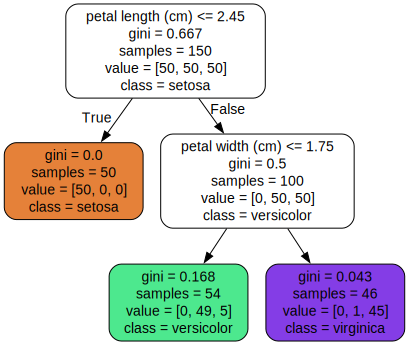

In [3]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [4]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |   

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

## Decision
$J(k,t_k) = \frac{m_{LEFT}}{m} G_{LEFT} + \frac{m_{RIGHT}}{m} G_{RIGHT}$ /
- k: feature k
- $t_k$: treshold

In [6]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

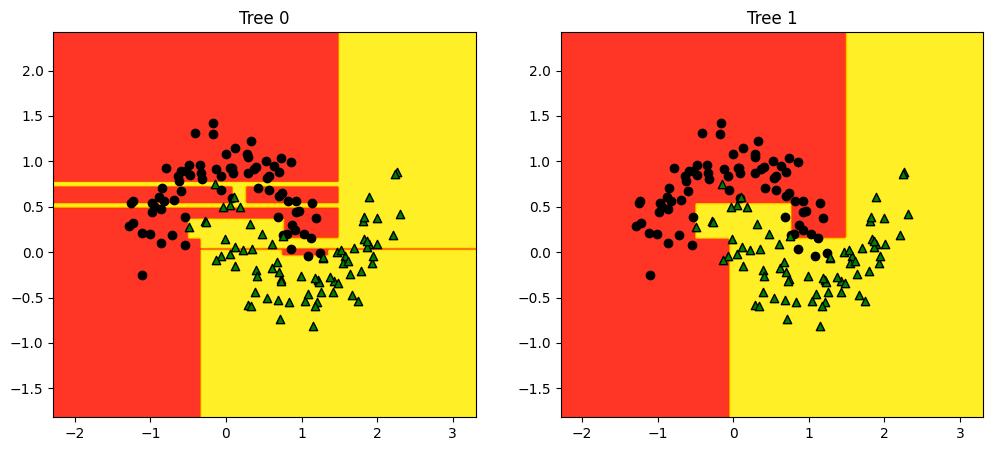

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

trees = [tree_clf1,tree_clf2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['k','g']
for idx,ax in enumerate(axes):
    Z = trees[idx].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.85, cmap=plt.cm.autumn)
    for i, marker in enumerate(['o','^']):
        ax.scatter(X_moons[y_moons == i, 0], X_moons[y_moons == i, 1], 
                    c=colors[i],marker=marker, edgecolor="k")
    ax.set_title(f"Tree {idx}")

plt.show()

In [8]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

In [9]:
tree_clf1.score(X_moons_test,y_moons_test)

0.898

In [10]:
tree_clf2.score(X_moons_test,y_moons_test)

0.92

In [11]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [12]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names = ["x1"],
    rounded=True,
    filled=True
)


(process:2412): Pango-WARNING **: 20:12:45.887: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


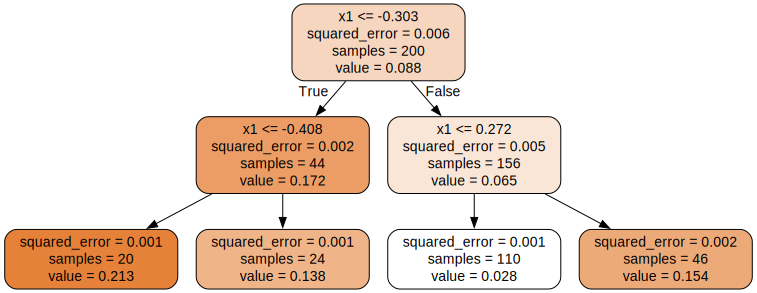

In [13]:
Source.from_file("regression_tree.dot")

In [14]:
help(tree_reg.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |   

In [18]:
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg3.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

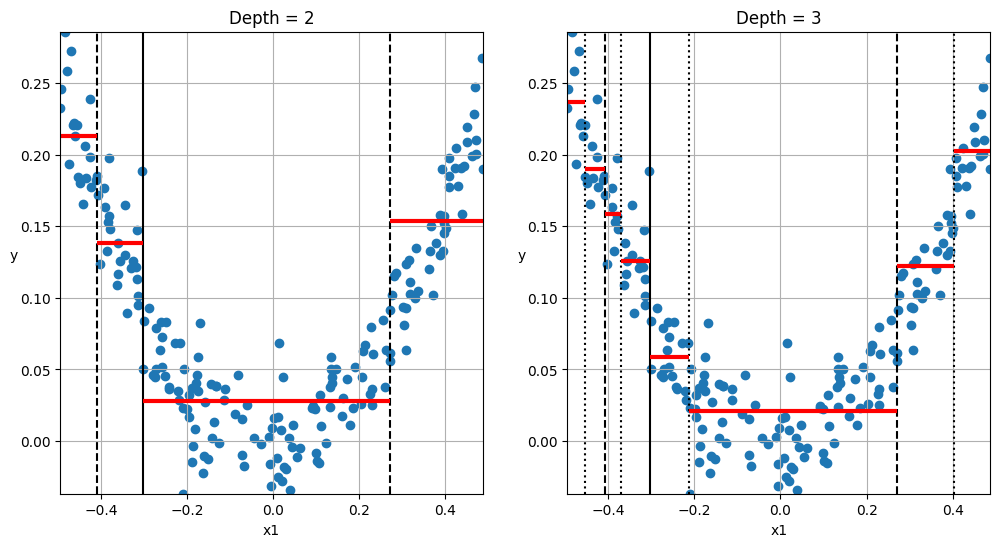

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
linestyles = ['solid','dashed','dotted']
for idx,tree in enumerate([tree_reg.tree_,tree_reg3.tree_]):    
    thresholds = tree.threshold 
    values = tree.value
    ax[idx].scatter(X_quad,y_quad)
    ax[idx].vlines(thresholds[[x-1 for x in tree.children_left if x>0]][np.array([x for x in tree.compute_node_depths() if x != tree.max_depth+1]).argsort()],
                [y_quad.min()]*(len([x for x in tree.children_left if x < 0])-1),
                [y_quad.max()]*(len([x for x in tree.children_left if x < 0])-1),
                colors = ['k']*(len([x for x in tree.children_left if x < 0])-1),
                linestyles= [linestyles[0]]+[elem for i, elem in enumerate(linestyles[1:tree.max_depth]) for _ in range(2**(i+1))])
    xmin = np.concatenate(([X_quad.min()],thresholds[[x-1 for x in tree.children_left if x>0]]))
    xmax = np.concatenate((thresholds[[x-1 for x in tree.children_left if x>0]],[X_quad.max()]))
    xmin.sort()
    xmax.sort()
    ax[idx].hlines([tree.value[i] for i in range(tree.node_count) if tree.children_left[i] == -1],
               xmin,
               xmax,
               colors=['r']*len([x for x in tree.children_left if x < 0]),linewidth=3)
    ax[idx].axis(xmin=X_quad.min(),xmax=X_quad.max(),ymin=y_quad.min(),ymax=y_quad.max())
    ax[idx].set_xlabel('x1')
    ax[idx].set_ylabel('y',rotation='horizontal')
    ax[idx].set_title(f'Depth = {tree.max_depth}')
    ax[idx].grid(True)
plt.show()

### Cost function for regression
$J(k,t_k) = \frac{m_{LEFT}}{m} MSE_{LEFT} + \frac{m_{RIGHT}}{m} MSE_{RIGHT}$ /
- $MSE_{node} = \frac{\sum_{i \in node}(\hat{y}_{node}-y^{(i)})^2}{m_{node}}$
- $\hat{y}_{node} = \frac{\sum_{i \in node}y^{(i)}}{m_{node}}$

## Disadvantages
- Axis orientation: than certains cases, it can be treated by PCA
- High Variance: ensemble of trees take it down

## Exercises

1. What	is	the	approximate	depth	of	a	decision	tree	trained	(without
 restrictions)	on	a	training	set	with	one	million	instances?
    $log_2(m) = log_2(10^6) = log(10^6)/log(2) \approx 20$
2. Is	a	node’s	Gini	impurity	generally	lower	or	higher	than	its	parent’s?	Is	it
 generally	lower/higher,	or	always	lower/higher?
    It is GENERALLY lower
3. If	a	decision	tree	is	overfitting	the	training	set,	is	it	a	good	idea	to	try
 decreasing	max_depth?
    Yes
4. If	a	decision	tree	is	underfitting	the	training	set,	is	it	a	good	idea	to	try
 scaling	the	input	features?
    This wouldn't make much a difference, a better work around would be trying to use PCA
5. If	it	takes	one	hour	to	train	a	decision	tree	on	a	training	set	containing	one
 million	instances,	roughly	how	much	time	will	it	take	to	train	another
 decision	tree	on	a	training	set	containing	ten	million	instances?	Hint:
 consider	the	CART	algorithm’s	computational	complexity.
    CART is $O(n x m x log_2(m)$ so if for n = 10e6 it takes one hour, for n = 10e7 it would take 10 hours
6. If	it	takes	one	hour	to	train	a	decision	tree	on	a	given	training	set,	roughly
 how	much	time	will	it	take	if	you	double	the	number	of	features?
    $O(nx2x m x log_2(2xm)$ so time would be multiplied roughly by 2, so 2 hours

7. Train	and	fine-tune	a	decision	tree	for	the	moons	dataset	by	following	these
 steps: \
 a.	Use	make_moons(n_samples=10000,	noise=0.4)	to
 generate	a	moons	dataset. \
 b.	Use	train_test_split()	to	split	the	dataset	into	a	training	set
 and	a	test	set. \
 c.	Use	grid	search	with	cross-validation	(with	the	help	of	the
 GridSearchCV	class)	to	find	good	hyperparameter	values	for	a
 DecisionTreeClassifier.	Hint:	try	various	values	for
 max_leaf_nodes. \
 d.	Train	it	on	the	full	training	set	using	these	hyperparameters,	and
 measure	your	model’s	performance	on	the	test	set.	You	should	get
 roughly	85%	to	87%	accuracy. 

In [59]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV

# a
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)
# b
X_train, X_test, y_train, y_test = train_test_split(X_moons,y_moons,test_size=0.2,random_state=42)

params = {
        'max_leaf_nodes': list(range(2, 100)),
        'max_depth': list(range(1, 7)),
        'min_samples_split': [2, 3, 4]
        }

tree_clf_gd = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=params,cv=3)
tree_clf_gd.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [60]:
tree_clf_gd.best_params_

{'max_depth': 6, 'max_leaf_nodes': 17, 'min_samples_split': 2}

In [61]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf_gd.predict(X_test)
accuracy_score(y_test,y_pred)

0.8595

8. Grow	a	forest	by	following	these	steps: \
 a.	Continuing	the	previous	exercise,	generate	1,000	subsets	of	the
 training	set,	each	containing	100	instances	selected	randomly.	Hint:
 you	can	use	Scikit-Learn’s	ShuffleSplit	class	for	this. \
 b.	Train	one	decision	tree	on	each	subset,	using	the	best	hyperparameter
 values	found	in	the	previous	exercise.	Evaluate	these	1,000	decision
 trees	on	the	test	set.	Since	they	were	trained	on	smaller	sets,	these
 decision	trees	will	likely	perform	worse	than	the	first	decision	tree,
 achieving	only	about	80%	accuracy. \
 c.	Now	comes	the	magic.	For	each	test	set	instance,	generate	the
 predictions	of	the	1,000	decision	trees,	and	keep	only	the	most
frequent	prediction	(you	can	use	SciPy’s	mode()	function	for	this).
 This	approach	gives	you	majority-vote	predictions	over	the	test	set. \
 d.	Evaluate	these	predictions	on	the	test	set:	you	should	obtain	a	slightly
 higher	accuracy	than	your	first	model	(about	0.5	to	1.5%	higher).
 Congratulations,	you	have	trained	a	random	forest	classifier! 

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from sklearn.metrics import accuracy_score

ss = ShuffleSplit(n_splits=1000,test_size=len(X_train)-100,random_state=42)
forest = [clone(tree_clf_gd.best_estimator_) for _ in range(1000)]
accuracies = []

for tree,(train,test) in zip(forest,ss.split(X_train)):
    tree.fit(X_train[train],y_train[train])
    accuracies.append(accuracy_score(y_test,tree.predict(X_test)))
np.mean(accuracies)

0.8056605

In [70]:
from scipy.stats import mode

predictions = []

for i,instance in enumerate(X_test):
    preds = []
    for tree in forest:
        preds.append(tree.predict([instance]))
    predictions.append(mode(preds))

In [71]:
predictions = [x.mode[0] for x in predictions]

In [73]:
accuracy_score(y_test,predictions)

0.873

In [77]:
trees = [tree_clf_gd.best_estimator_.fit(X_train[:100],y_test[:100]),
         tree_clf_gd.best_estimator_.fit(X_train[340:440],y_test[340:440])]

In [80]:
trees[0].tree_

In [83]:
export_graphviz(
    trees[0],
    out_file="tree_gd0.dot",
    feature_names = ["x1","x2"],
    rounded=True,
    filled=True
)
export_graphviz(
    trees[1],
    out_file="tree_gd1.dot",
    feature_names = ["x1","x2"],
    rounded=True,
    filled=True
)


(process:22192): Pango-WARNING **: 02:05:41.428: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


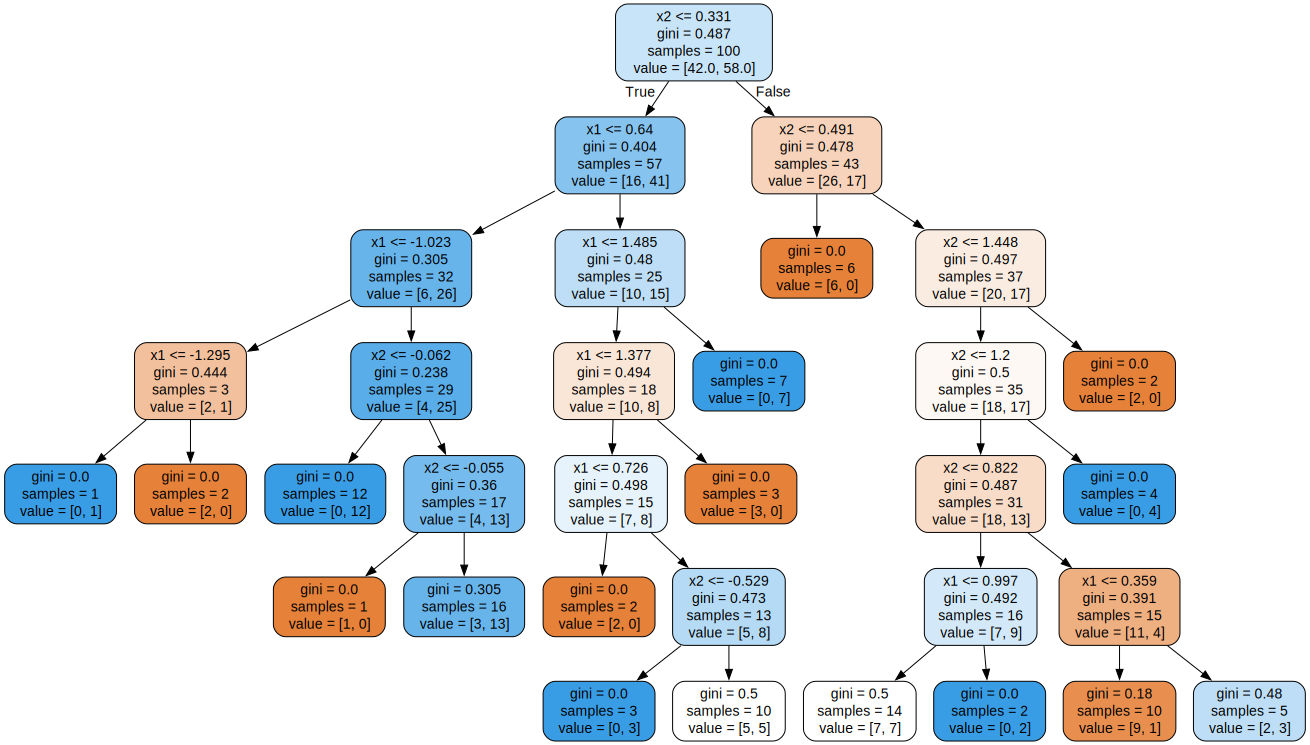

In [84]:
Source.from_file("tree_gd0.dot")


(process:20656): Pango-WARNING **: 02:05:57.221: couldn't load font "Helvetica Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


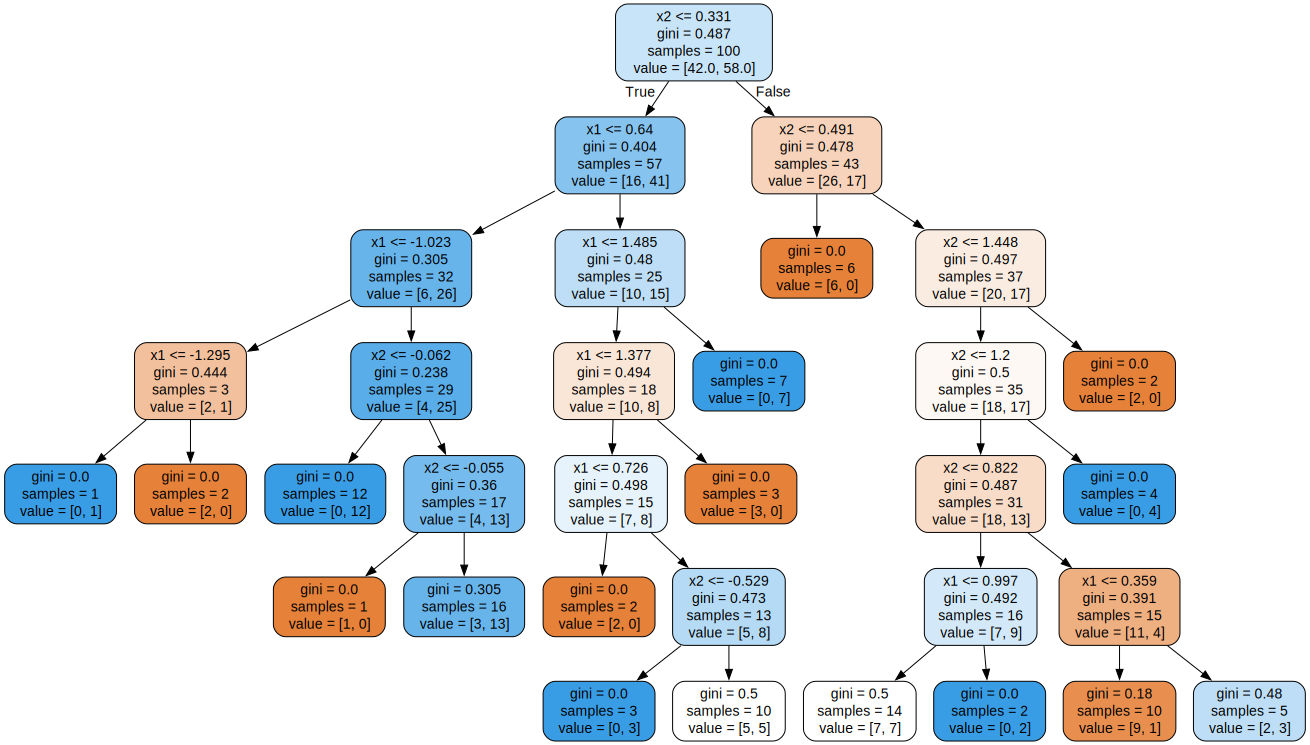

In [85]:
Source.from_file("tree_gd1.dot")